In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

In [7]:
#Logistic regression (Binary Classification)
indf = pd.read_csv('../data/ml/insurance_data.csv')
indf.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0, 0.5, 'Bought_Insurance')

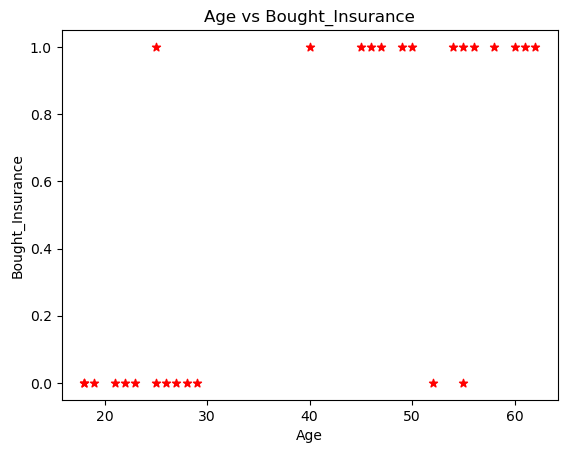

In [9]:
plt.scatter(indf.age,indf.bought_insurance,marker="*", color="red")
plt.title("Age vs Bought_Insurance")
plt.xlabel("Age")
plt.ylabel("Bought_Insurance")

In [19]:
X_train,X_test,y_train, y_test = train_test_split(indf[["age"]],indf.bought_insurance,test_size=0.1,random_state=32)

model = LogisticRegression()
model.fit(X_train,y_train)
print(X_test)
model.predict(X_test)

    age
18   19
26   23
12   27


array([0, 0, 0])

In [20]:
model.score(X_test,y_test)

1.0

In [21]:
model.predict_proba(X_test)

array([[0.91123077, 0.08876923],
       [0.86200748, 0.13799252],
       [0.79172796, 0.20827204]])

In [26]:
hrdf = pd.read_csv('../data/ml/HR_comma_sep.csv')
hrdf.head()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [33]:
hrdf.shape

(14999, 10)

array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:>]], dtype=object)

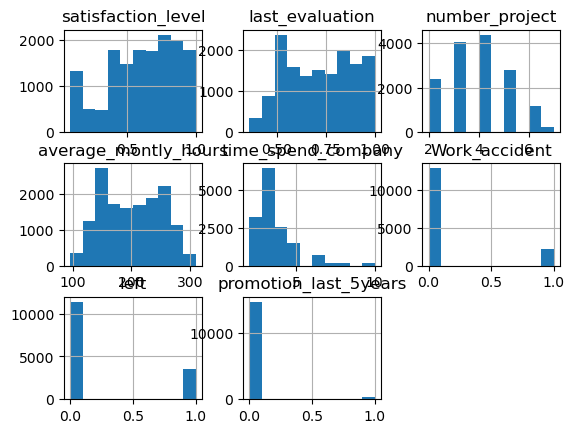

In [27]:
hrdf.hist()

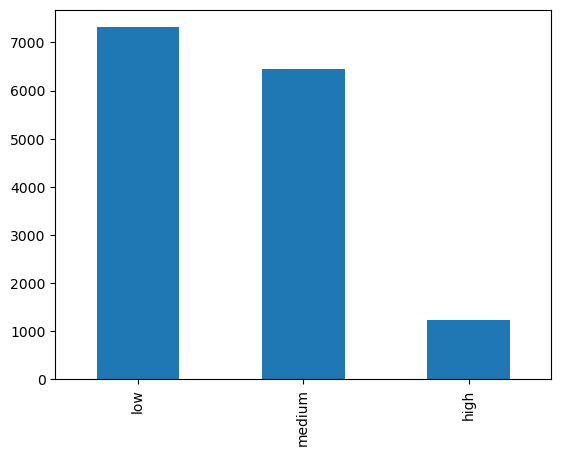

In [29]:
hrdf['salary'].value_counts().plot(kind='bar')
plt.show()

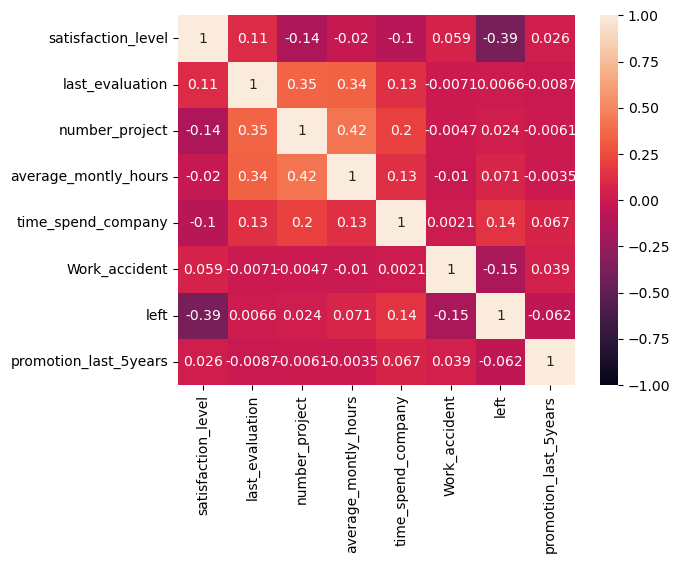

In [30]:
sns.heatmap(hrdf.corr(),vmin=-1, vmax=1, annot=True);

In [36]:
hrdf.groupby("left").mean()
#Satisfaction , Avg Monthly hpurs and Promotion seem to have an impact on retention

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

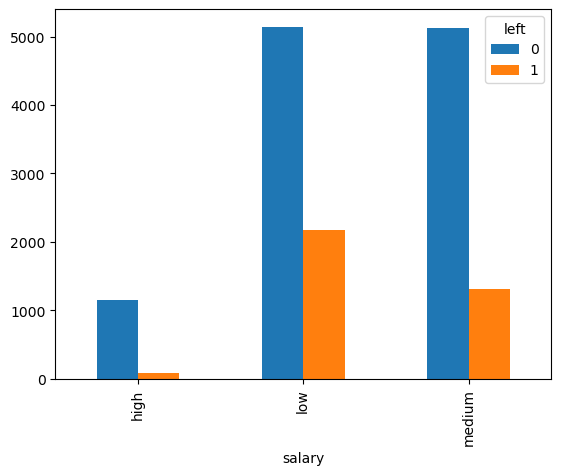

In [40]:
pd.crosstab(hrdf.salary,hrdf.left).plot(kind="bar")

<AxesSubplot:xlabel='Department'>

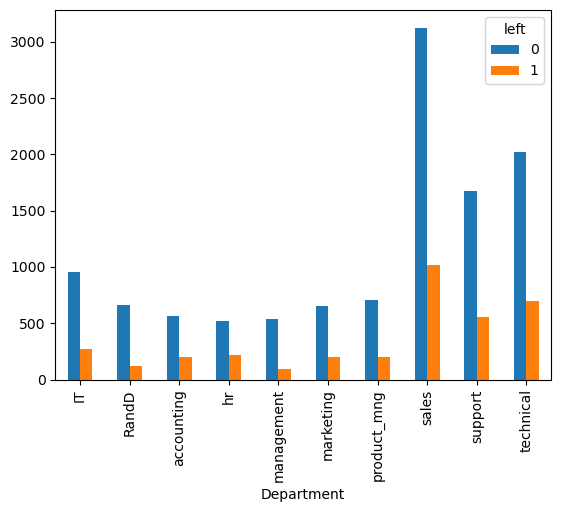

In [41]:
pd.crosstab(hrdf.Department,hrdf.left).plot(kind="bar")

In [57]:
X = hrdf[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [58]:
#one hot encode salary column
salary_dummies = pd.get_dummies(X.salary, prefix="salary")
X = pd.concat([X,salary_dummies],axis='columns')
X.drop('salary',axis='columns',inplace=True)
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [59]:
y=hrdf[['left']]
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [85]:
X_train,X_test,y_train, y_test = train_test_split(X,y,train_size=0.5,random_state=32)

model = LogisticRegression()
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
X_test['predicted_left'] = y_predicted.tolist()
print(X_test)
print(X_test.predicted_left.value_counts())

       satisfaction_level  average_montly_hours  promotion_last_5years  \
10759                0.58                   140                      0   
8888                 0.93                   229                      0   
6185                 0.74                   257                      0   
3003                 0.75                   177                      0   
14254                0.10                   281                      0   
...                   ...                   ...                    ...   
6588                 0.47                   241                      0   
7837                 0.14                   172                      0   
2028                 0.61                   267                      0   
4247                 0.86                   252                      0   
13133                0.18                   147                      0   

       salary_high  salary_low  salary_medium  predicted_left  
10759            0           1              0  

/Users/reddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
model.score(X_test,y_test)

0.776

In [90]:
#Multi class classification using logistic regression
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

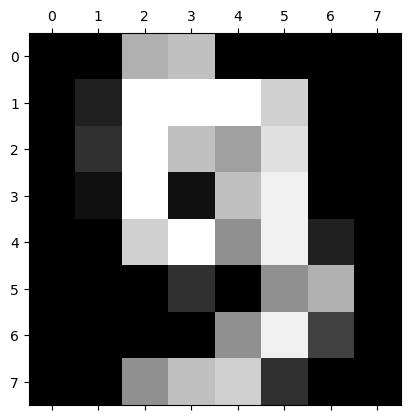

In [95]:
plt.gray()
plt.matshow(digits.images[9])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.2)
dlgm = LogisticRegression(solver='lbfgs', max_iter=3000)
dlgm.fit(X_train, y_train)
dlgm.score(X_test,y_test)


0.9583333333333334

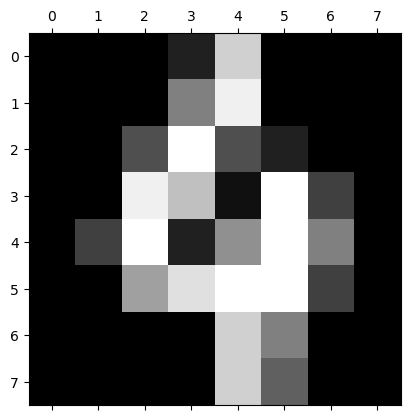

In [103]:
plt.matshow(digits.images[100])

In [114]:
print(digits.target[100])
print(dlgm.predict([digits.data[100]]))
dlgm.predict(digits.data[0:20])

4
[4]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [118]:
#Check how many values were predicted correct and wrong in the test set
y_predicted = dlgm.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  1,  0,  0,  0,  0,  0,  2],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 38,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 33]])

Text(50.722222222222214, 0.5, 'Truth')

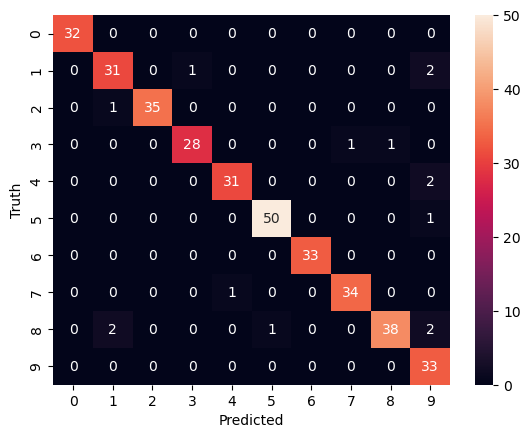

In [120]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [124]:
#Multi class logistic regression with iris dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [135]:
iris.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [139]:
print(iris.target_names)
iris.target[0:150]

['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [140]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.2)
ilgm = LogisticRegression(solver='lbfgs', max_iter=3000)
ilgm.fit(X_train, y_train)
ilgm.score(X_test,y_test)

0.9666666666666667

In [142]:
y_predicted = ilgm.predict(X_test)
y_predicted

array([0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 1, 1, 1])

In [143]:
y_test

array([0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 1, 1, 1])

Text(50.722222222222214, 0.5, 'Truth')

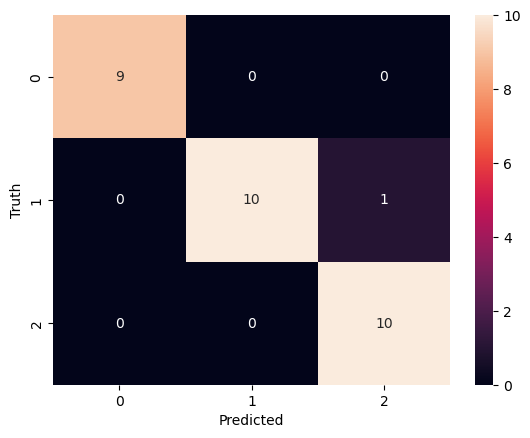

In [144]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')